Kaggle: https://www.kaggle.com/c/otto-group-product-classification-challenge

Tutorial: https://www.kaggle.com/jiuzhang/ai-camp-neural-networks-otto

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
TRAIN_DIR = './input/train.csv'
TEST_DIR = './input/test.csv'

# Explantory Data Analyisis - Take a Glance at the Data

In [3]:
train = pd.read_csv(TRAIN_DIR, sep=',', header=0)
test = pd.read_csv(TEST_DIR, sep=',', header=0)
print(f'training set shape: {train.shape}')
print(f'test set shape: {test.shape}')

training set shape: (61878, 95)
test set shape: (144368, 94)


In [4]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [5]:
train.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object

In [6]:
test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


Observations:<br>
1.There are 61878 data points in training set and 144368 in test set.<br>
2.There are 94 features.

In [7]:
train.isnull().any().any()

False

In [8]:
test.isnull().any().any()

False

Observations: <br>
1.There are no missing data in training and test set.<br>

# Explantory Data Analyisis - Research on Label

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='target', ylabel='count'>

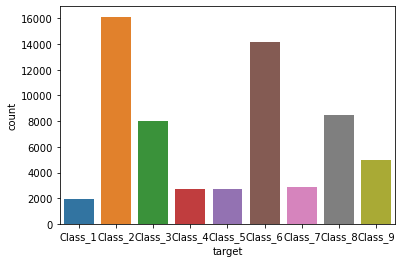

In [10]:
sns.countplot(x=train['target'])

# Prepare Data

In [11]:
X_train, y_train = train[train.columns[1:-1]], train[train.columns[-1]]
X_test = test[test.columns[1:]]
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')

X train shape: (61878, 93)
y train shape: (61878,)
X test shape: (144368, 93)


# Neural Net

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (30, 10), random_state = 1, verbose = True)
cross_val_score(nn, X_train, y_train, cv=5)

array([0.78288623, 0.78434066, 0.78215902, 0.79280808, 0.78408081])

In [14]:
nn.fit(X_train, y_train)
prediction = nn.predict_proba(X_test)

In [15]:
submission = pd.DataFrame(prediction, 
                          columns=['Class_1','Class_2','Class_3',
                                   'Class_4','Class_5', 'Class_6',
                                   'Class_7','Class_8','Class_9'])
submission['id'] = test['id']
columns = submission.columns.tolist()
submission = submission[columns[-1:] + columns[:-1]]
submission.to_csv('./submission.csv', index = False)